# Analysis - exp13 and 14

Repeats of stumbler (13) and stumbler-strategist (14) exps, with optimal parameters.

In [1]:
import os
import csv
import numpy as np
#import torch as th

from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

# Find the files
## Exp 13

In [2]:
path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp13/"
#results_path = "/Users/type/Code/azad/data/wythoff/"

files = sorted(glob(os.path.join(path, "run_*_monitor.csv")))
files[:10]

exp_13 = []
for fi in files:
    mon = load_monitored(fi)
    exp_13.append(mon)

## Exp 14

In [3]:
path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp14/"

exp_14 = []
runs = range(1, 101)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*.csv".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_14.append(mon)

In [4]:
path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp14_replay/"

exp_14_replay = []
runs = range(1, 101)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*.csv".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_14_replay.append(mon)

In [5]:
path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp14_perfect_replay/"

exp_14_perfect_replay = []
runs = range(1, 101)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*.csv".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_14_perfect_replay.append(mon)

In [6]:
pprint(exp_13[0].keys())
pprint(exp_14[0].keys())
pprint(exp_14_replay[0].keys())
pprint(exp_14_perfect_replay[0].keys())

dict_keys(['file', 'episode', 'loss', 'score', 'total_losses', 'total_moves', 'total_op_move_opportunities', 'total_op_moves', 'total_reward', 'total_wins'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_losses', 'total_moves', 'total_op_move_opportunities', 'total_op_moves', 'total_reward', 'total_wins'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_losses', 'total_moves', 'total_op_move_opportunities', 'total_op_moves', 'total_reward', 'total_wins'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_losses', 'total_reward', 'total_wins'])


In [7]:
print(np.max([np.max(mon['score'][-100:-1]) for mon in exp_13]))
print(np.max([np.max(mon['score'][-100:-1]) for mon in exp_14]))
print(np.max([np.max(mon['score'][-100:-1]) for mon in exp_14_replay]))

0.8112579037546728
0.9288984509466423
0.9330470067453707


# Plots

## Optimal play

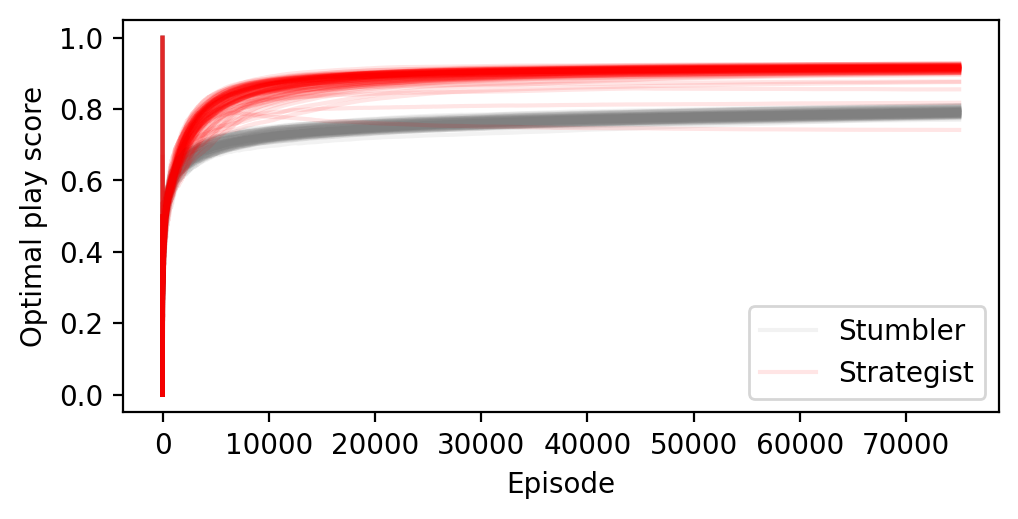

In [8]:
plt.figure(figsize=(5, 2.5))

for n, mon in enumerate(exp_13):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Stumbler"
        
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='grey', alpha=.1,  label=lab)

for n, mon in enumerate(exp_14):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Strategist"
    
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='red', alpha=.1, label=lab)

_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score")

In [9]:
episode_13,        exp_13_avg,        exp_13_SE        = score_summary(exp_13)
episode_14,        exp_14_avg,        exp_14_SE        = score_summary(exp_14)
episode_14_replay, exp_14_replay_avg, exp_14_replay_SE = score_summary(exp_14_replay)

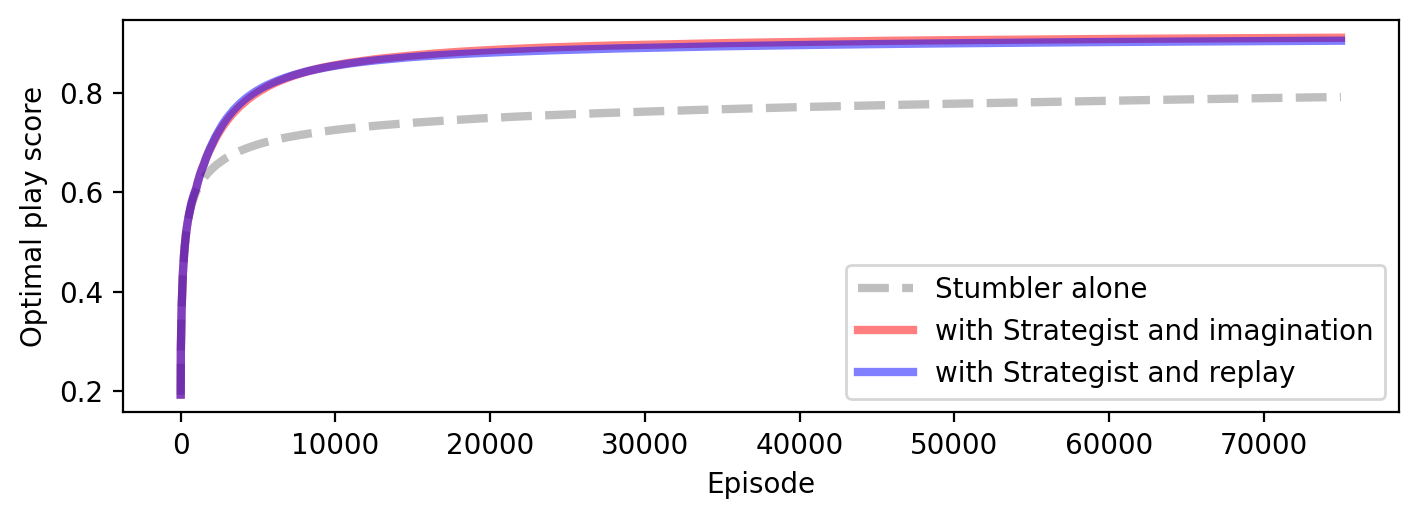

In [10]:
plt.figure(figsize=(7, 2.5))
_ = plt.plot(episode_13, exp_13_avg, linestyle="--", color='grey', alpha=.5, linewidth=3, label="Stumbler alone")
_ = plt.plot(episode_14, exp_14_avg, color='red', alpha=.5, linewidth=3, label="with Strategist and imagination")
_ = plt.plot(episode_14_replay, exp_14_replay_avg, color='blue', alpha=.5, linewidth=3, label="with Strategist and replay")
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score")

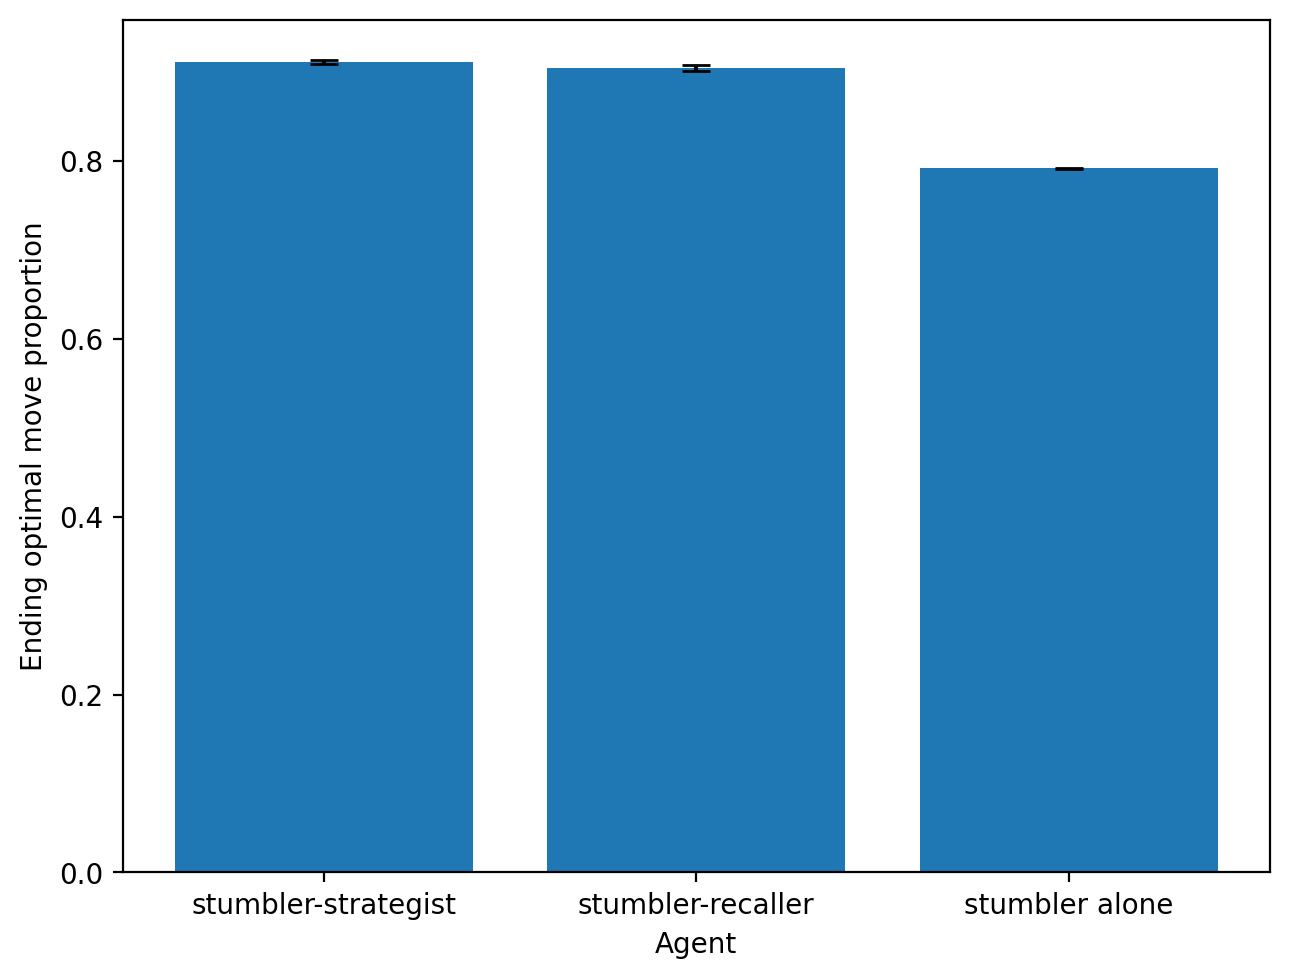

In [11]:
plt.figure()

plt.bar(range(3), [exp_14_avg[-1], exp_14_replay_avg[-1], exp_13_avg[-1]],
             yerr=[exp_14_SE[-1],  exp_14_replay_SE[-1],  exp_13_SE[-1] ], capsize=5)

_ = plt.tight_layout()
# _ = plt.ylim(0, 1)
_ = plt.xlabel("Agent")
_ = plt.ylabel("Ending optimal move proportion")
_ = plt.xticks(range(3), labels = ["stumbler-strategist", "stumbler-recaller", "stumbler alone"])

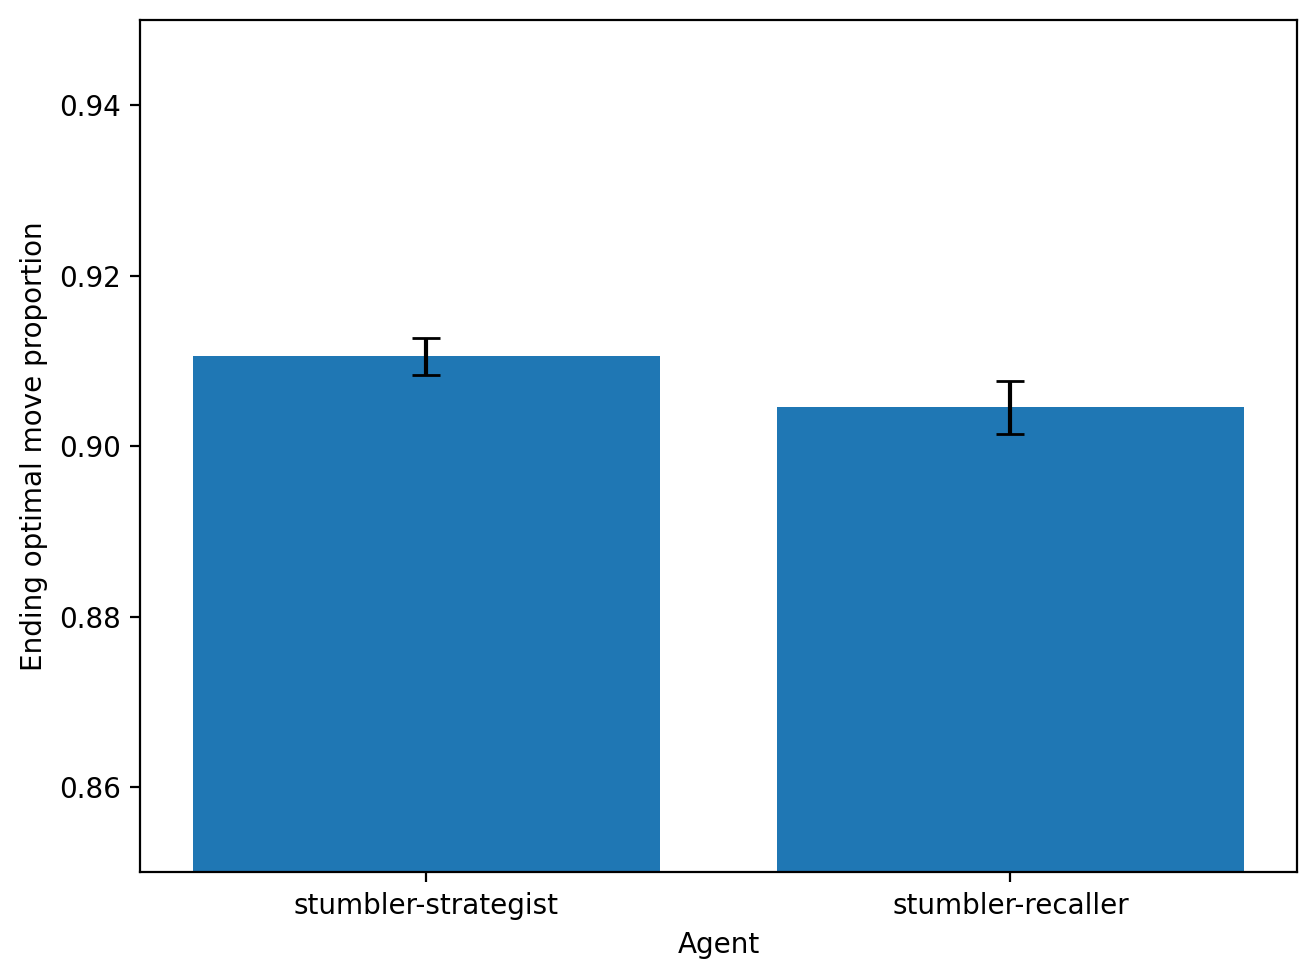

In [12]:
plt.figure()

plt.bar(range(2), [exp_14_avg[-1], exp_14_replay_avg[-1]],
             yerr=[exp_14_SE[-1],  exp_14_replay_SE[-1] ], capsize=5)

_ = plt.tight_layout()
_ = plt.ylim(0.85, 0.95)
_ = plt.xlabel("Agent")
_ = plt.ylabel("Ending optimal move proportion")
_ = plt.xticks(range(2), labels = ["stumbler-strategist", "stumbler-recaller"])

## Total reward

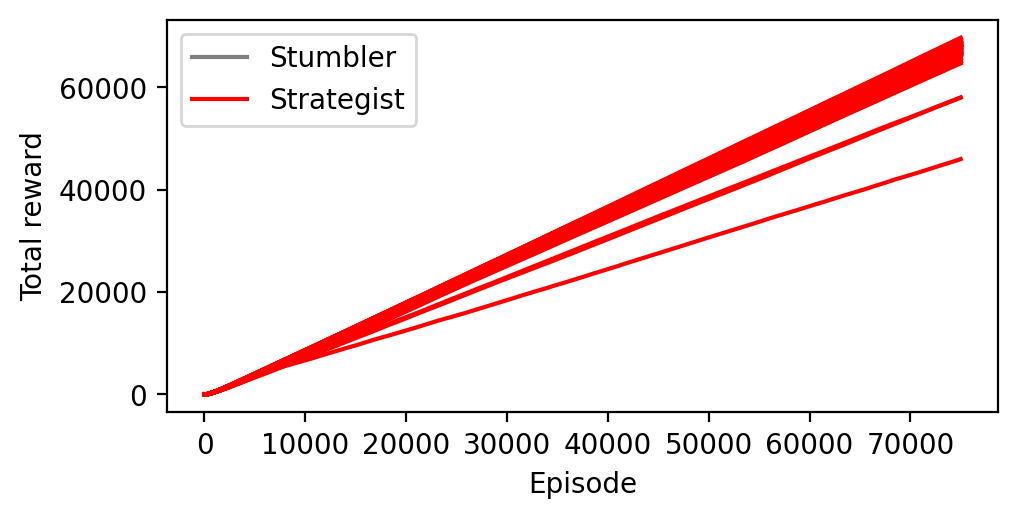

In [13]:
plt.figure(figsize=(5, 2.5))

for n, mon in enumerate(exp_13):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Stumbler"
        
    # Plot
    _ = plt.plot(
            mon['episode'], 
            np.asarray(mon['total_reward']),
            color='grey', alpha=1,  label=lab
    )

for n, mon in enumerate(exp_14):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Strategist"
    
    # Plot
    _ = plt.plot(
            mon['episode'], 
            np.asarray(mon['total_reward']),
            color='red', alpha=1, label=lab
    )

_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Total reward")

In [14]:
# def load_stumbler_data(path, index_range=(0, 20)):
#     exps = []
#     runs = range(index_range[0], index_range[1])
#     for r in runs:
#         files = sorted(glob(os.path.join(path, 
#             "run_{}_episode*_stumbler*".format(int(r)))))

#         mon = join_monitored(files, sort_key='episode')
#         exps.append(mon)
#     return exps

In [15]:
# path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp14/"
# exp_14 = load_stumbler_data(path, (1, 21))

# path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp14_replay/"
# exp_14_replay = load_stumbler_data(path, (1, 21))

# path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp13/"
# exp_13 = load_stumbler_data(path, (1, 21))

In [16]:
pprint(exp_13[0].keys())
pprint(exp_14[0].keys())
pprint(exp_14_replay[0].keys())
pprint(exp_14_perfect_replay[0].keys())

dict_keys(['file', 'episode', 'loss', 'score', 'total_losses', 'total_moves', 'total_op_move_opportunities', 'total_op_moves', 'total_reward', 'total_wins'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_losses', 'total_moves', 'total_op_move_opportunities', 'total_op_moves', 'total_reward', 'total_wins'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_losses', 'total_moves', 'total_op_move_opportunities', 'total_op_moves', 'total_reward', 'total_wins'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_losses', 'total_reward', 'total_wins'])


In [17]:
# print(exp_14[0]['total_wins'][475:525])
# # print(exp_14[0]['total_wins'][100])

# for i in range(len(exp_14)):
#     exp_14[i]['total_wins'] = np.array(exp_14[i]['total_wins'])
#     add = 0
#     for j in range(int(len(exp_14[i]['total_wins']) / 100)):
#         exp_14[i]['total_wins'][j * 100 : (j + 1) * 100] += add
#         add = exp_14[i]['total_wins'][((j + 1) * 100) - 1]

# print(exp_14[0]['total_wins'][475:525])
# # print(exp_14[0]['total_wins'][100])

# for i in range(len(exp_14_replay)):
#     exp_14_replay[i]['total_wins'] = np.array(exp_14_replay[i]['total_wins'])
#     add = 0
#     for j in range(int(len(exp_14_replay[i]['total_wins']) / 100)):
#         exp_14_replay[i]['total_wins'][j * 100 : (j + 1) * 100] += add
#         add = exp_14_replay[i]['total_wins'][((j + 1) * 100) - 1]

        

# plt.figure(figsize=(5, 2.5))

# # for n, mon in enumerate(exp_13):
# #     # Only want one legend entry
# #     lab = None
# #     if n == 0:
# #         lab = "Stumbler"
        
# #     # Plot
# #     _ = plt.plot(
# #             mon['episode'], 
# #             np.asarray(mon['total_wins']),
# #             color='grey', alpha=1,  label=lab
# #     )

# # for n, mon in enumerate(exp_14):
# #     # Only want one legend entry
# #     lab = None
# #     if n == 0:
# #         lab = "Strategist"
    
# #     # Plot
# #     _ = plt.plot(
# #             mon['episode'], 
# #             np.asarray(mon['total_wins']),
# #             color='red', alpha=1, label=lab
# #     )

# # _ = plt.tight_layout()
# # _ = plt.legend()
# # _ = plt.xlabel("Episode")
# # _ = plt.ylabel("Total wins")
# # _ = plt.xlim(400,600)
# # _ = plt.ylim(0,1000)

In [18]:
episode_13,        exp_13_avg,        exp_13_SE        = score_summary(exp_13,        key="total_reward")
episode_14,        exp_14_avg,        exp_14_SE        = score_summary(exp_14,        key="total_reward")
episode_14_replay, exp_14_replay_avg, exp_14_replay_SE = score_summary(exp_14_replay, key="total_reward")

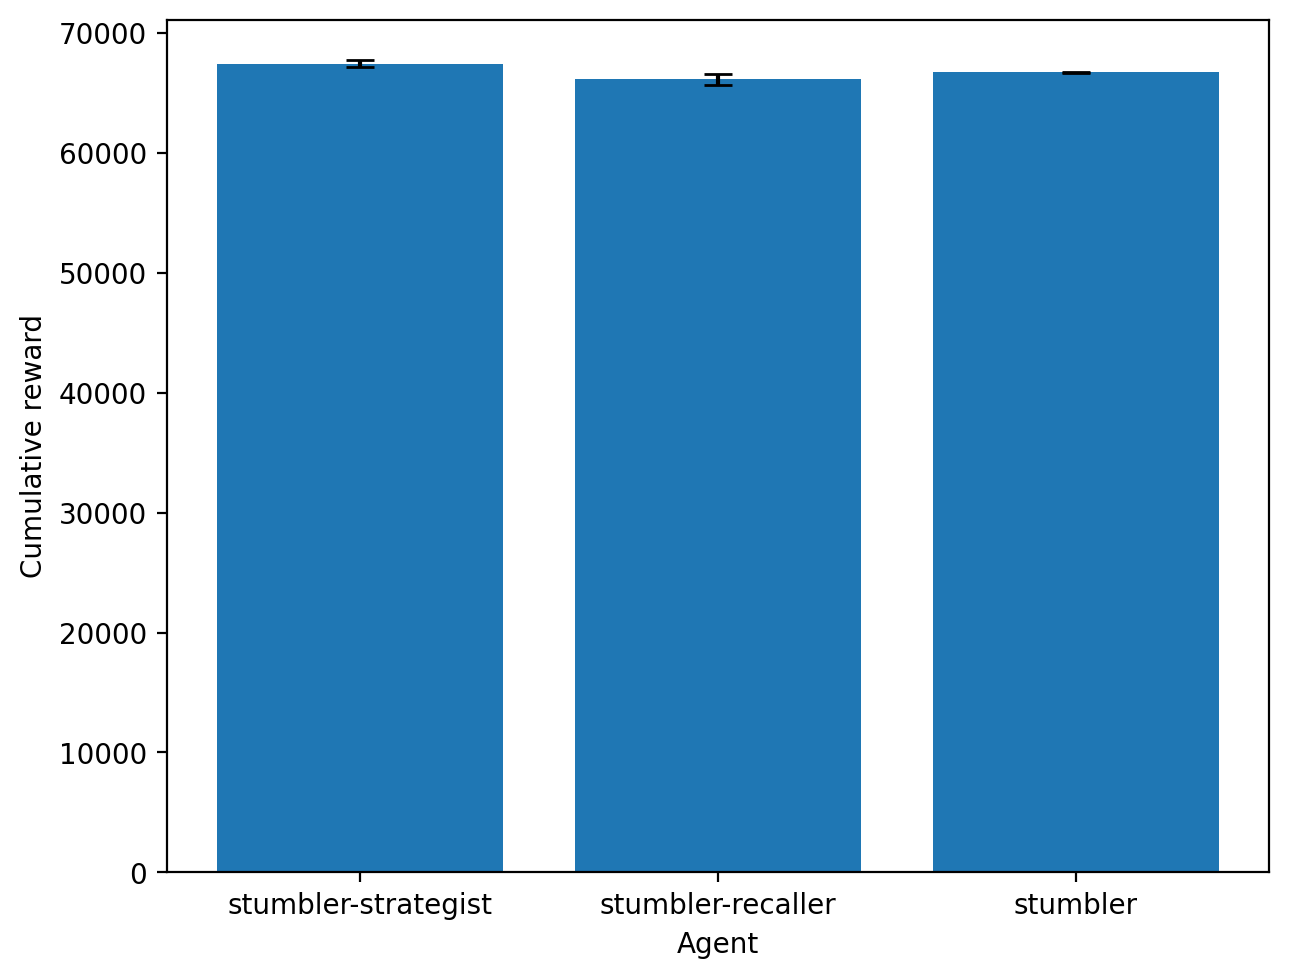

In [19]:
plt.figure()

plt.bar(range(3), [exp_14_avg[-1], exp_14_replay_avg[-1], exp_13_avg[-1]],
             yerr=[exp_14_SE[-1],  exp_14_replay_SE[-1],  exp_13_SE[-1] ], capsize=5)

_ = plt.tight_layout()
# _ = plt.ylim(0, 1)
_ = plt.xlabel("Agent")
_ = plt.ylabel("Cumulative reward")
_ = plt.xticks(range(3), labels = ["stumbler-strategist", "stumbler-recaller", "stumbler"])

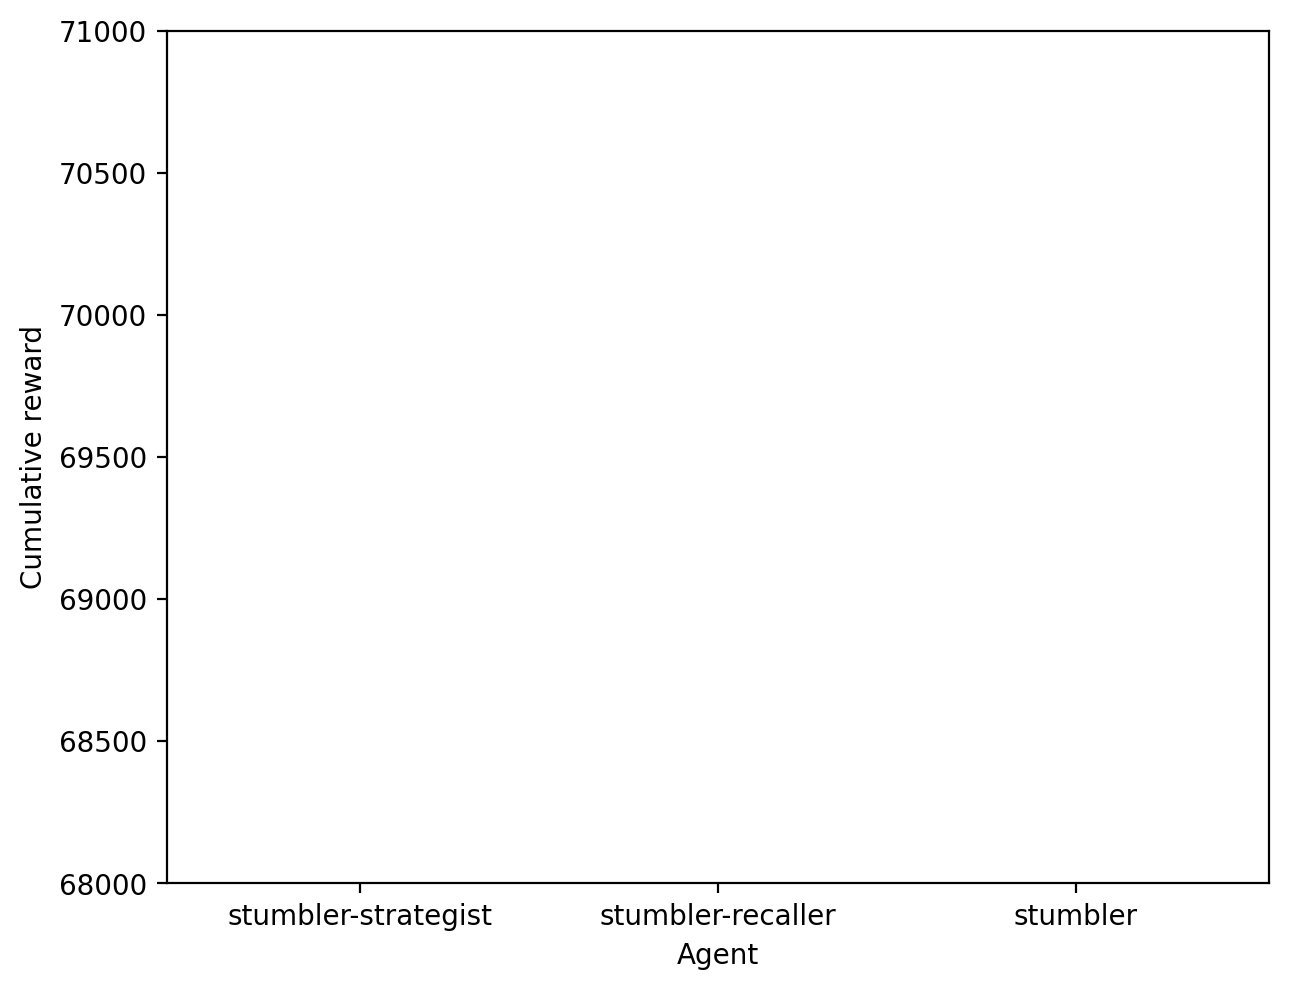

In [20]:
plt.figure()

plt.bar(range(3), [exp_14_avg[-1], exp_14_replay_avg[-1], exp_13_avg[-1]],
             yerr=[exp_14_SE[-1],  exp_14_replay_SE[-1],  exp_13_SE[-1] ], capsize=5)

_ = plt.tight_layout()
_ = plt.ylim(68000, 71000)
_ = plt.xlabel("Agent")
_ = plt.ylabel("Cumulative reward")
_ = plt.xticks(range(3), labels = ["stumbler-strategist", "stumbler-recaller", "stumbler"])

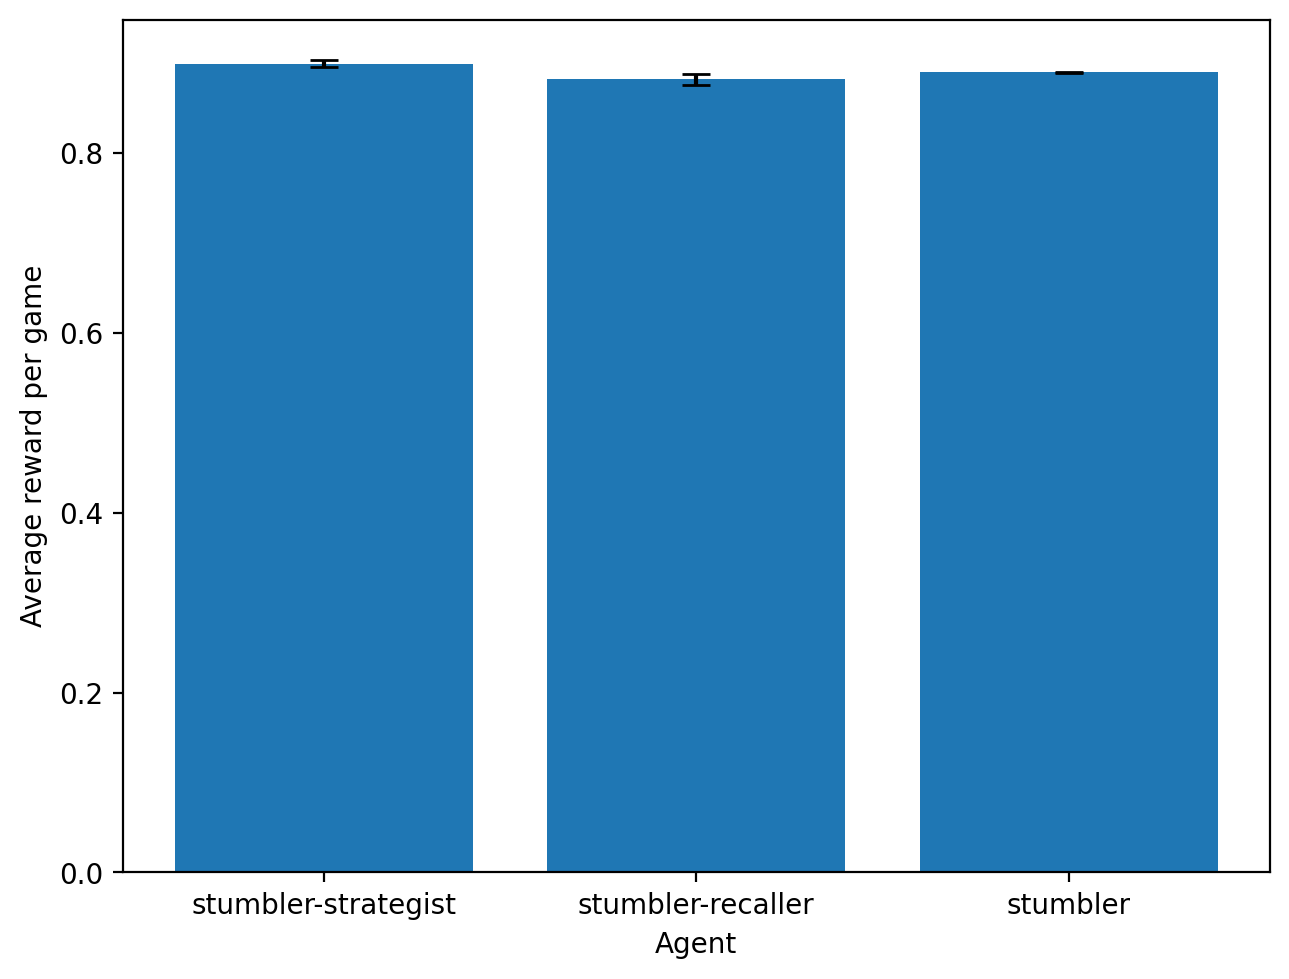

In [21]:
plt.figure()

plt.bar(range(3), [exp_14_avg[-1]        / max(episode_14),
                   exp_14_replay_avg[-1] / max(episode_14_replay),
                   exp_13_avg[-1]        / max(episode_13)],
        yerr=[exp_14_SE[-1]        / max(episode_14),
              exp_14_replay_SE[-1] / max(episode_14_replay),
              exp_13_SE[-1]        / max(episode_13)],
        capsize=5)

_ = plt.tight_layout()
# _ = plt.ylim(0, 1)
_ = plt.xlabel("Agent")
_ = plt.ylabel("Average reward per game")
_ = plt.xticks(range(3), labels = ["stumbler-strategist", "stumbler-recaller", "stumbler"])

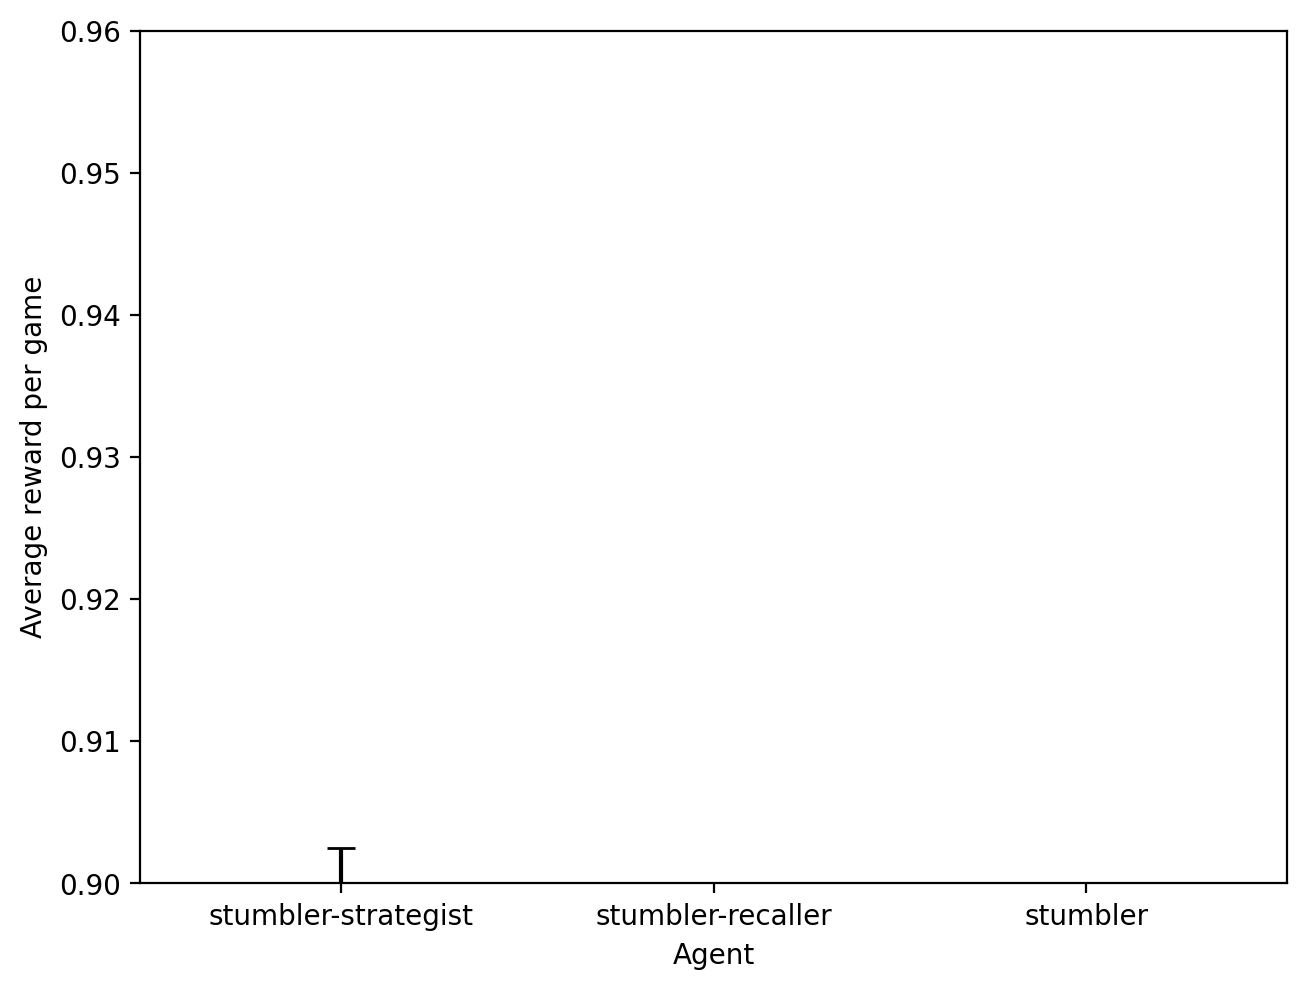

In [22]:
plt.figure()

plt.bar(range(3), [exp_14_avg[-1]        / max(episode_14),
                   exp_14_replay_avg[-1] / max(episode_14_replay),
                   exp_13_avg[-1]        / max(episode_13)],
        yerr=[exp_14_SE[-1]        / max(episode_14),
              exp_14_replay_SE[-1] / max(episode_14_replay),
              exp_13_SE[-1]        / max(episode_13)],
        capsize=5)

_ = plt.tight_layout()
_ = plt.ylim(0.9, 0.96)
_ = plt.xlabel("Agent")
_ = plt.ylabel("Average reward per game")
_ = plt.xticks(range(3), labels = ["stumbler-strategist", "stumbler-recaller", "stumbler"])

In [23]:
episode_13,        exp_13_avg,        exp_13_SE        = score_summary(exp_13,        key="total_wins")
episode_14,        exp_14_avg,        exp_14_SE        = score_summary(exp_14,        key="total_wins")
episode_14_replay, exp_14_replay_avg, exp_14_replay_SE = score_summary(exp_14_replay, key="total_wins")
episode_14_perfect_replay, exp_14_perfect_replay_avg, exp_14_perfect_replay_SE = score_summary(exp_14_perfect_replay, key="total_wins")

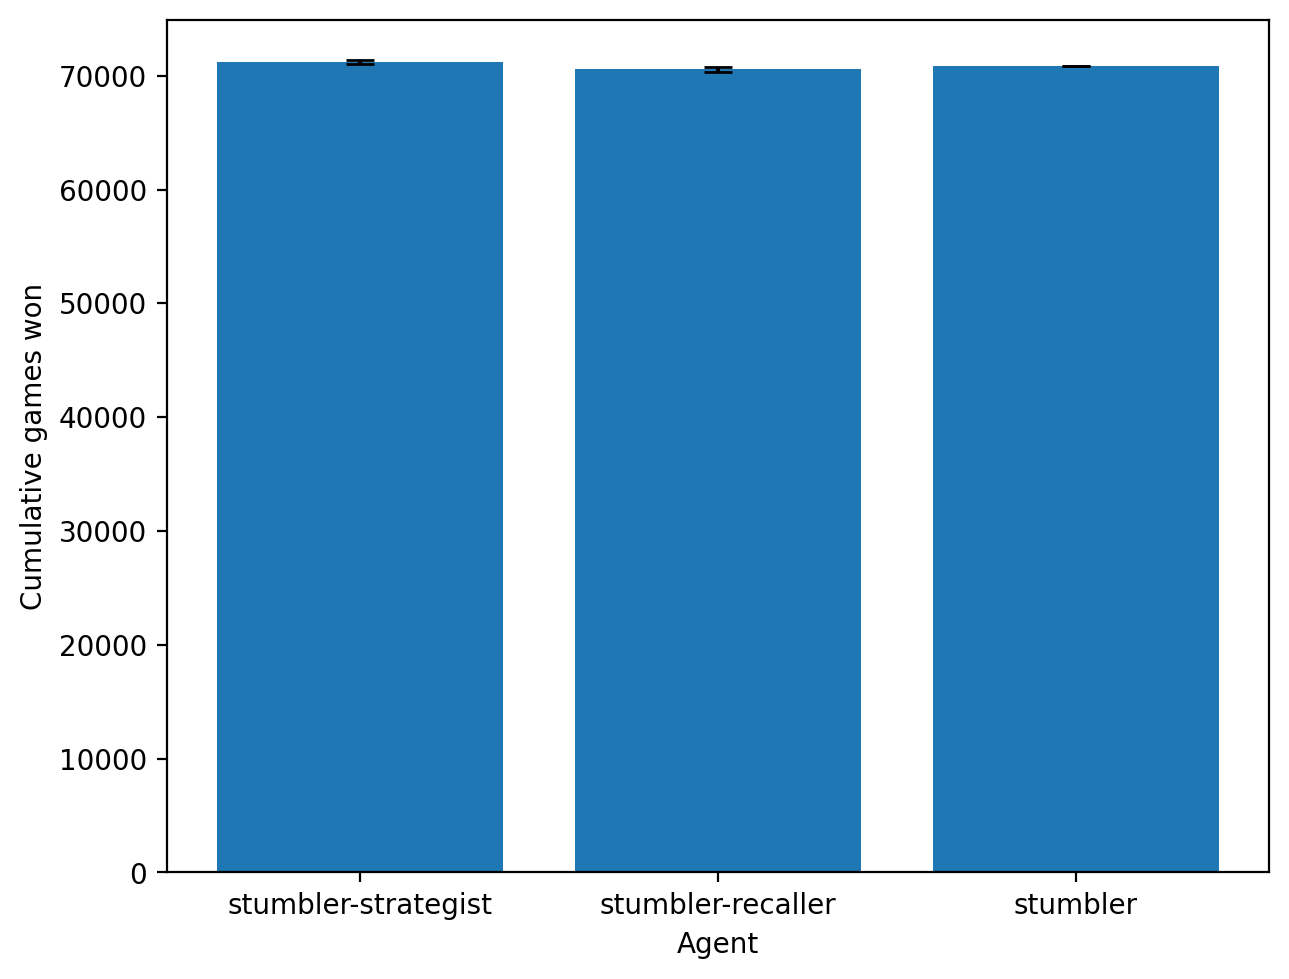

In [24]:
plt.figure()

plt.bar(range(3), [exp_14_avg[-1], exp_14_replay_avg[-1], exp_13_avg[-1]],
             yerr=[exp_14_SE[-1],  exp_14_replay_SE[-1],  exp_13_SE[-1] ], capsize=5)

_ = plt.tight_layout()
# _ = plt.ylim(0, 1)
_ = plt.xlabel("Agent")
_ = plt.ylabel("Cumulative games won")
_ = plt.xticks(range(3), labels = ["stumbler-strategist", "stumbler-recaller", "stumbler"])

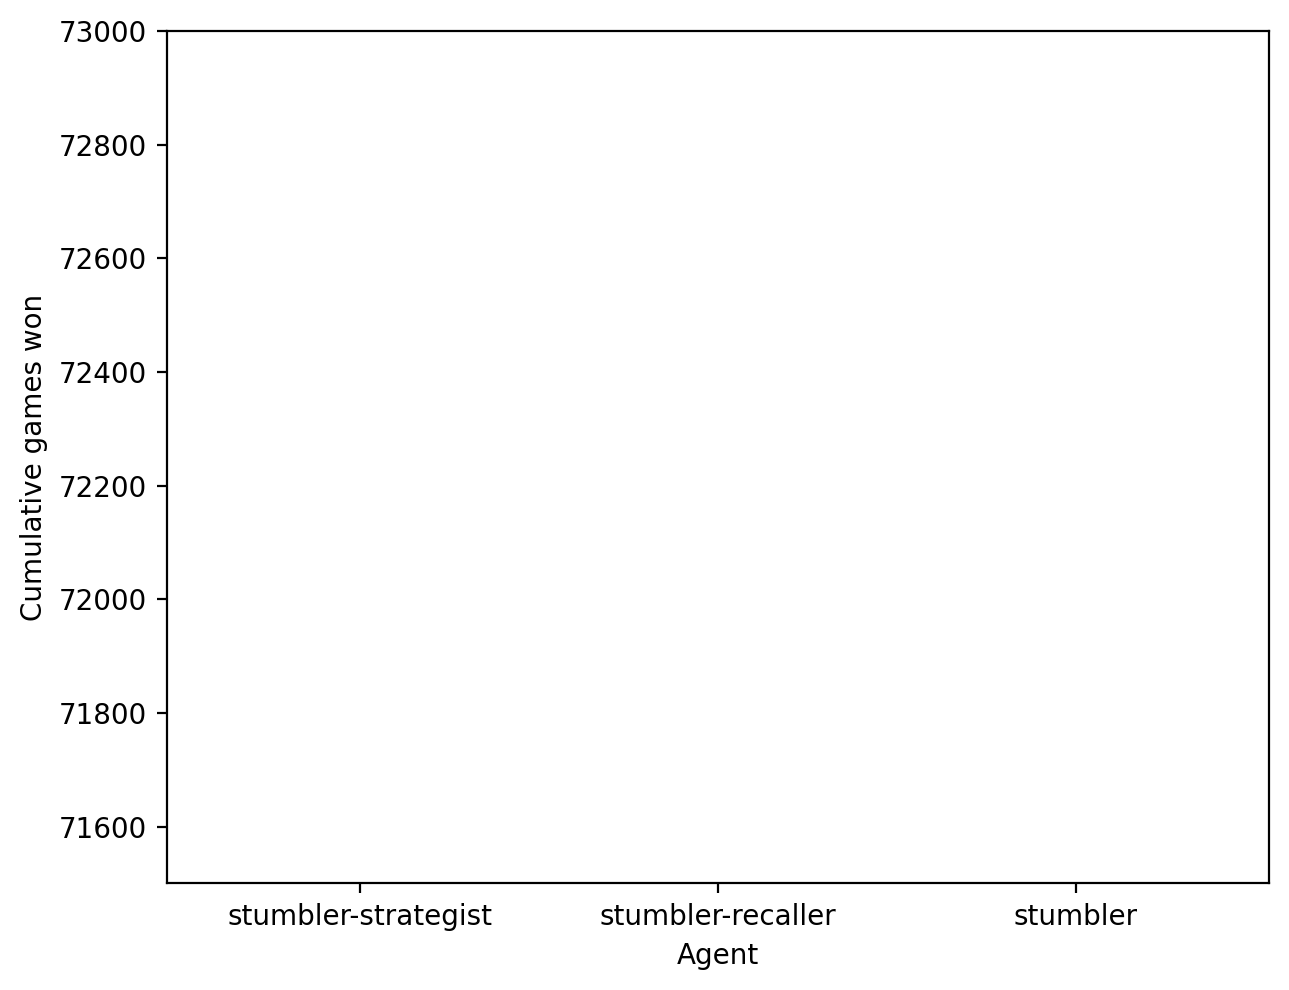

In [25]:
plt.figure()

plt.bar(range(3), [exp_14_avg[-1], exp_14_replay_avg[-1], exp_13_avg[-1]],
             yerr=[exp_14_SE[-1],  exp_14_replay_SE[-1],  exp_13_SE[-1] ], capsize=5)

_ = plt.tight_layout()
_ = plt.ylim(71500, 73000)
_ = plt.xlabel("Agent")
_ = plt.ylabel("Cumulative games won")
_ = plt.xticks(range(3), labels = ["stumbler-strategist", "stumbler-recaller", "stumbler"])

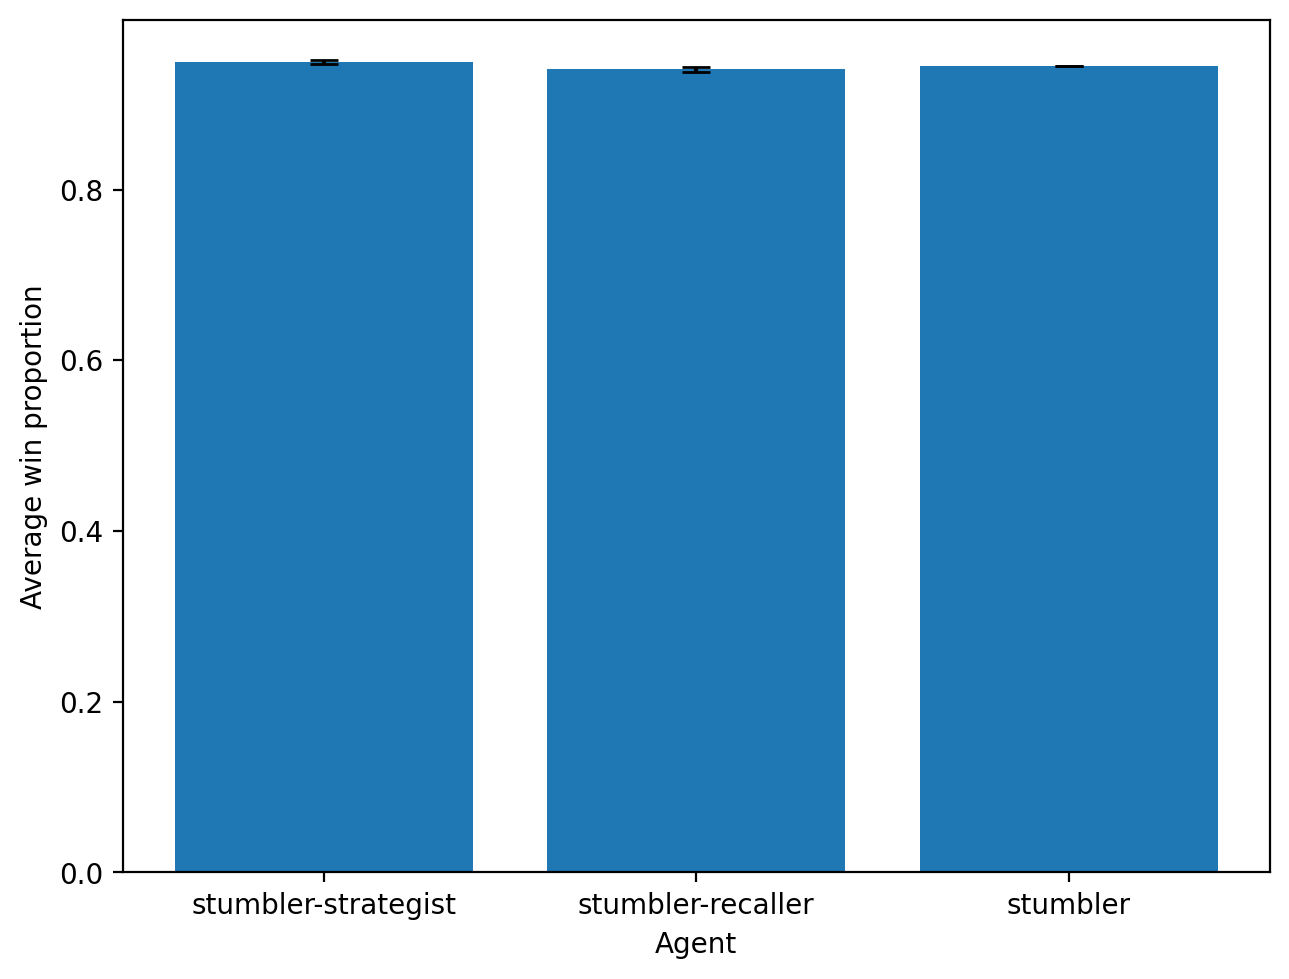

In [26]:
plt.figure()

plt.bar(range(3), [exp_14_avg[-1]        / max(episode_14),
                   exp_14_replay_avg[-1] / max(episode_14_replay),
                   exp_13_avg[-1]        / max(episode_13)],
             yerr=[exp_14_SE[-1]        / max(episode_14),
                   exp_14_replay_SE[-1] / max(episode_14_replay),
                   exp_13_SE[-1]        / max(episode_13)],
        capsize=5)

_ = plt.tight_layout()
# _ = plt.ylim(0, 1)
_ = plt.xlabel("Agent")
_ = plt.ylabel("Average win proportion")
_ = plt.xticks(range(3), labels = ["stumbler-strategist", "stumbler-recaller", "stumbler"])

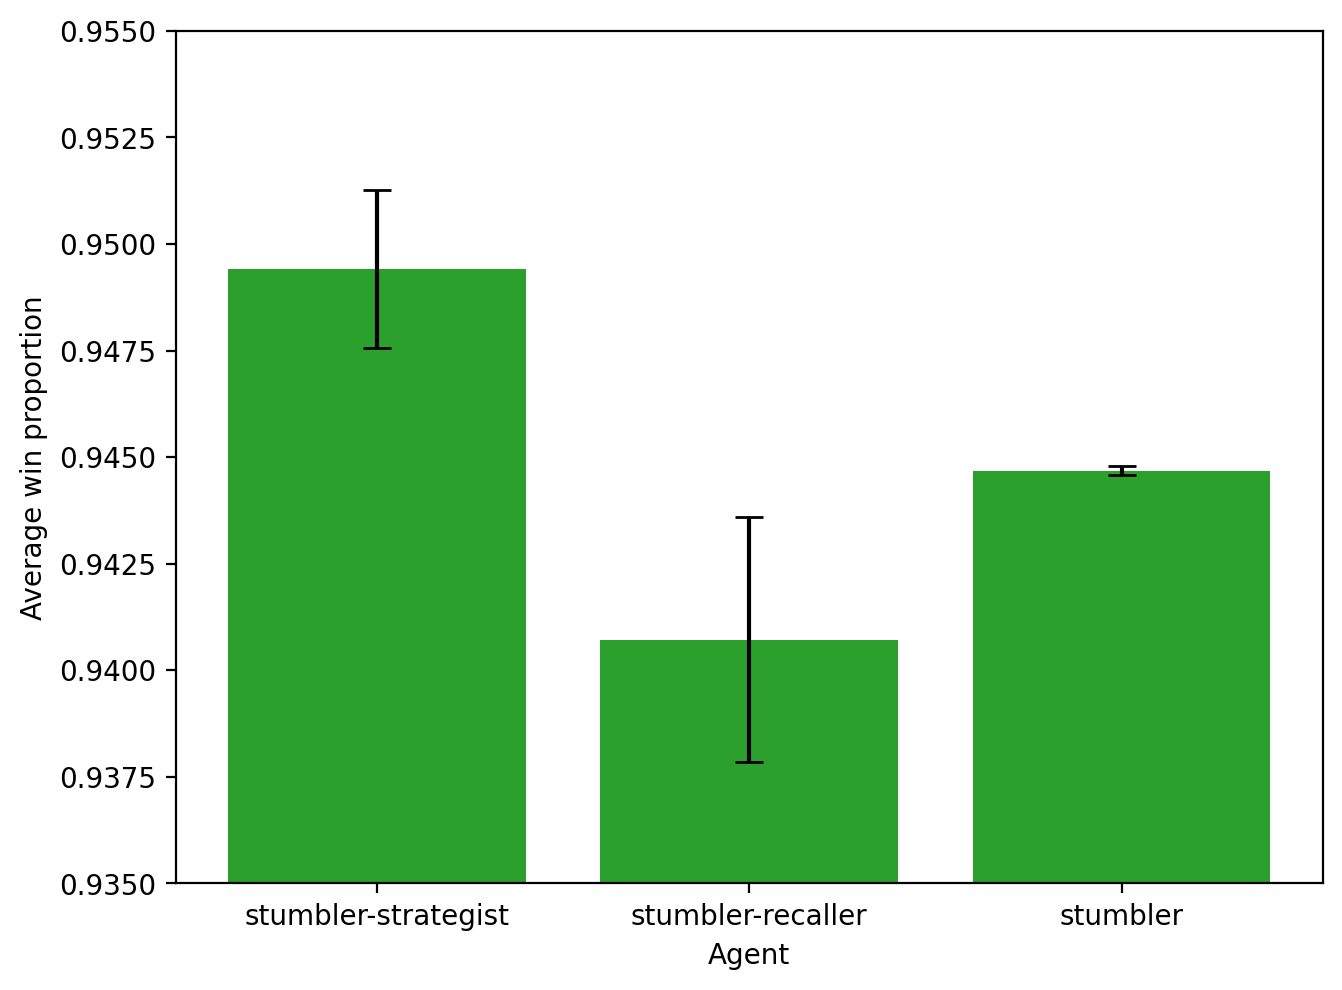

In [27]:
plt.figure()

plt.bar(range(3), [exp_14_avg[-1]        / max(episode_14),
                   exp_14_replay_avg[-1] / max(episode_14_replay),
                   exp_13_avg[-1]        / max(episode_13)],
             yerr=[exp_14_SE[-1]        / max(episode_14),
                   exp_14_replay_SE[-1] / max(episode_14_replay),
                   exp_13_SE[-1]        / max(episode_13)],
        color = 'C2',
        capsize=5)

_ = plt.tight_layout()
_ = plt.ylim(0.935, 0.955)
_ = plt.xlabel("Agent")
_ = plt.ylabel("Average win proportion")
_ = plt.xticks(range(3), labels = ["stumbler-strategist", "stumbler-recaller", "stumbler"])

/var/folders/kg/g1dd54k55952tgw_kmcj8wqr0000gn/T/ipykernel_5740/447246205.py:2: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(episode_13, exp_13_avg / episode_13, linestyle="--", color='grey', alpha=.5, linewidth=3, label="Stumbler alone")
/var/folders/kg/g1dd54k55952tgw_kmcj8wqr0000gn/T/ipykernel_5740/447246205.py:3: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(episode_14, exp_14_avg / episode_14, color='red', alpha=.5, linewidth=3, label="with Strategist and imagination")
/var/folders/kg/g1dd54k55952tgw_kmcj8wqr0000gn/T/ipykernel_5740/447246205.py:4: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(episode_14_replay, exp_14_replay_avg / episode_14_replay, color='blue', alpha=.5, linewidth=3, label="with Strategist and replay")


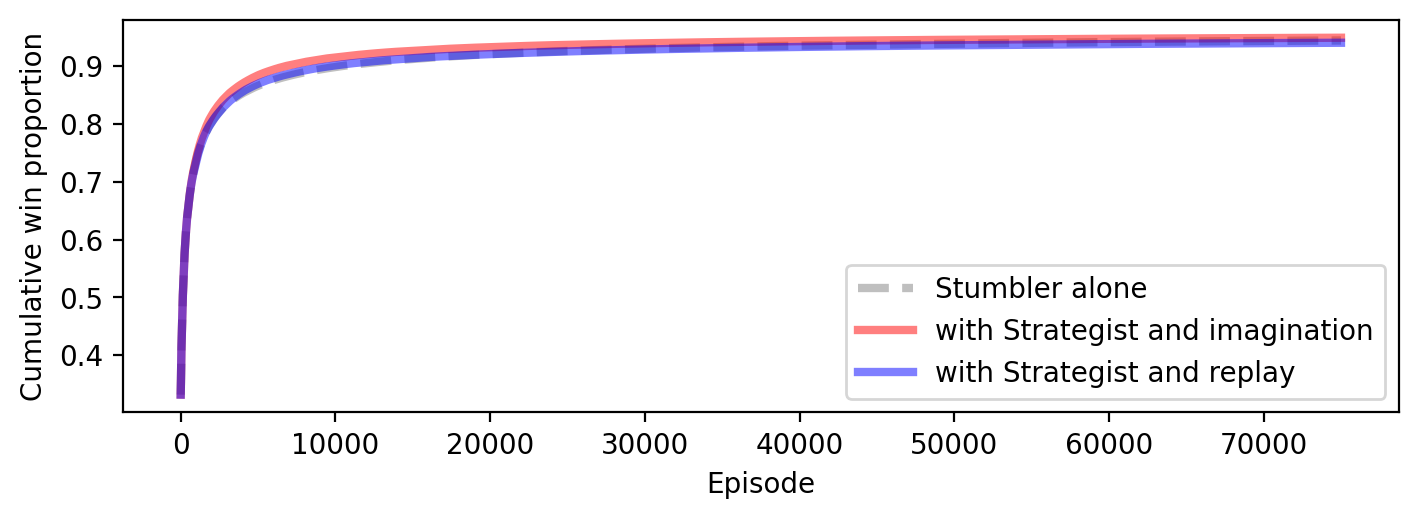

In [28]:
plt.figure(figsize=(7, 2.5))
_ = plt.plot(episode_13, exp_13_avg / episode_13, linestyle="--", color='grey', alpha=.5, linewidth=3, label="Stumbler alone")
_ = plt.plot(episode_14, exp_14_avg / episode_14, color='red', alpha=.5, linewidth=3, label="with Strategist and imagination")
_ = plt.plot(episode_14_replay, exp_14_replay_avg / episode_14_replay, color='blue', alpha=.5, linewidth=3, label="with Strategist and replay")
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Cumulative win proportion")

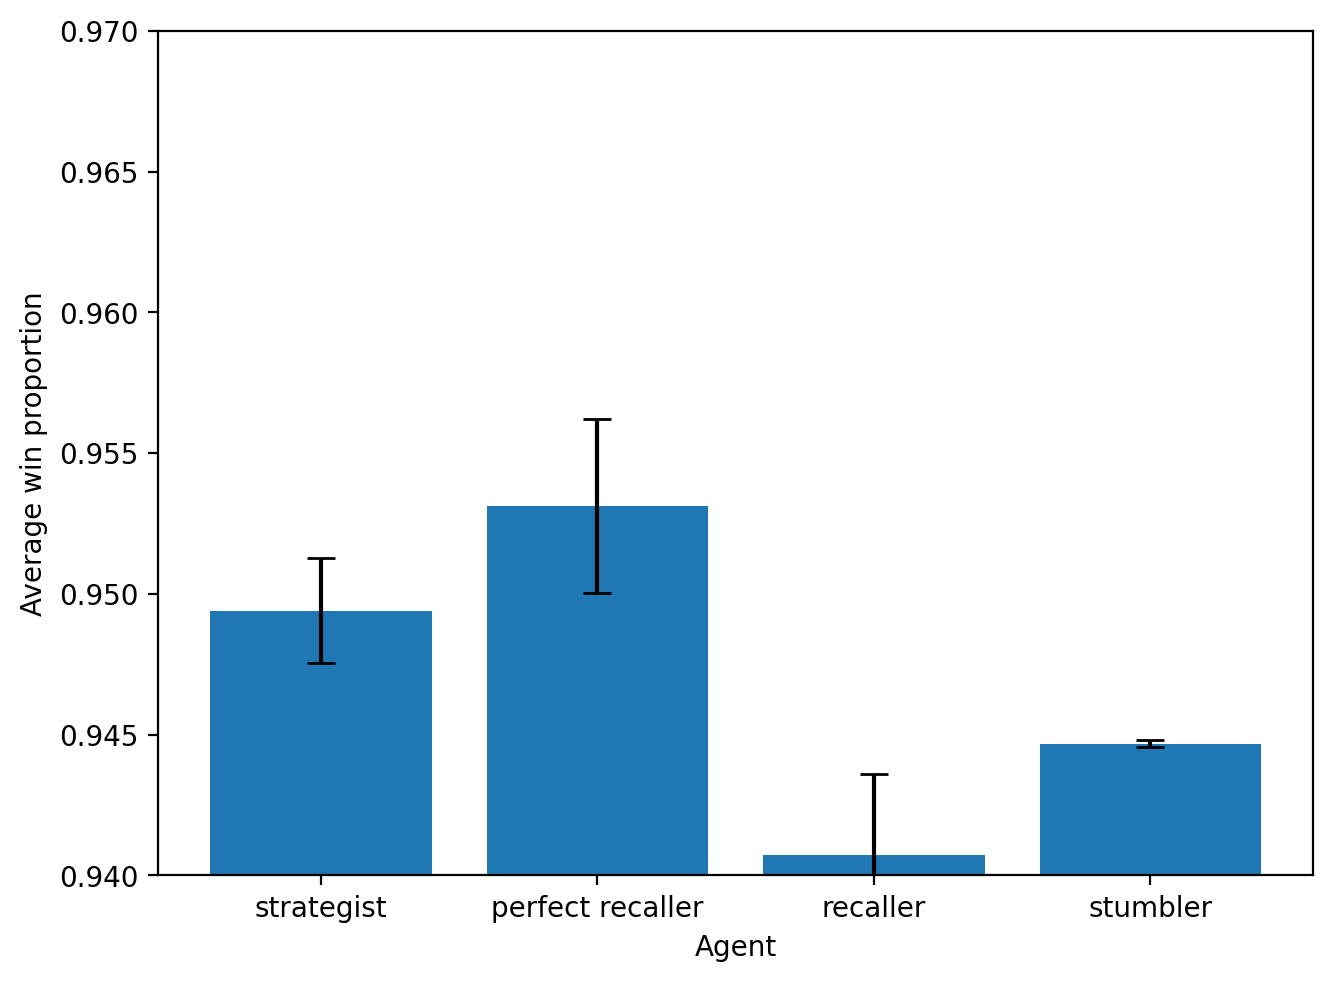

In [29]:
plt.figure()

plt.bar(range(4), [exp_14_avg[-1]        / max(episode_14),
                   exp_14_perfect_replay_avg[-1] / max(episode_14_perfect_replay),
                   exp_14_replay_avg[-1] / max(episode_14_replay),
                   exp_13_avg[-1]        / max(episode_13)],
             yerr=[exp_14_SE[-1]        / max(episode_14),
                   exp_14_perfect_replay_SE[-1] / max(episode_14_perfect_replay),
                   exp_14_replay_SE[-1] / max(episode_14_replay),
                   exp_13_SE[-1]        / max(episode_13)],
        capsize=5)

_ = plt.tight_layout()
_ = plt.ylim(0.94, 0.97)
_ = plt.xlabel("Agent")
_ = plt.ylabel("Average win proportion")
_ = plt.xticks(range(4), labels = ["strategist", "perfect recaller", "recaller", "stumbler"])

In [30]:
path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp14/"

exp_14 = []
runs = range(1, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_strategist*.csv".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_14.append(mon)

In [31]:
pprint(exp_14[0].keys())

dict_keys(['file', 'episode', 'loss', 'mae', 'mae_euclid'])


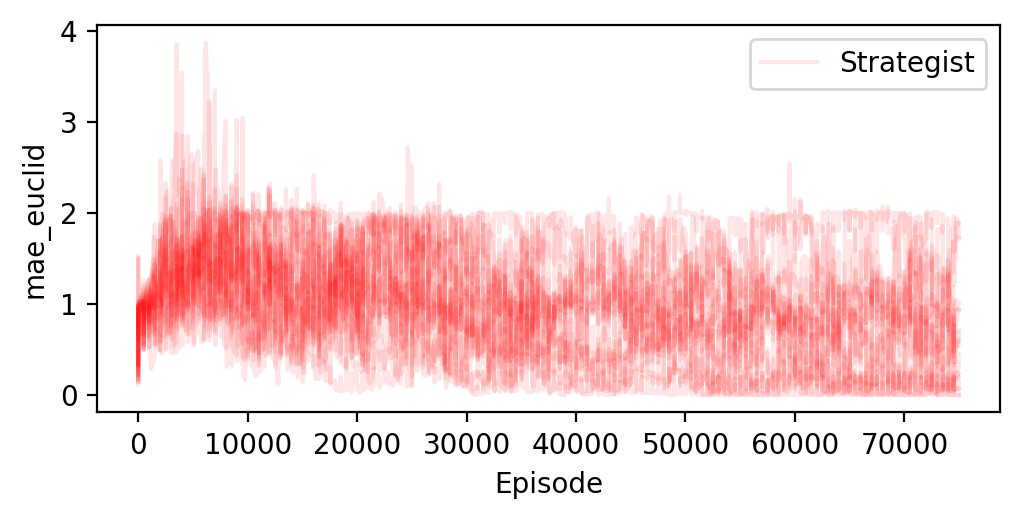

In [32]:
plt.figure(figsize=(5, 2.5))

for n, mon in enumerate(exp_14):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Strategist"
    
    # Plot
    _ = plt.plot(mon['episode'], mon['mae_euclid'], 
                    color='red', alpha=.1, label=lab)

_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("mae_euclid")

In [33]:
episode_14_euc, exp_14_avg_euc, _ = score_summary(exp_14, key='mae_euclid')

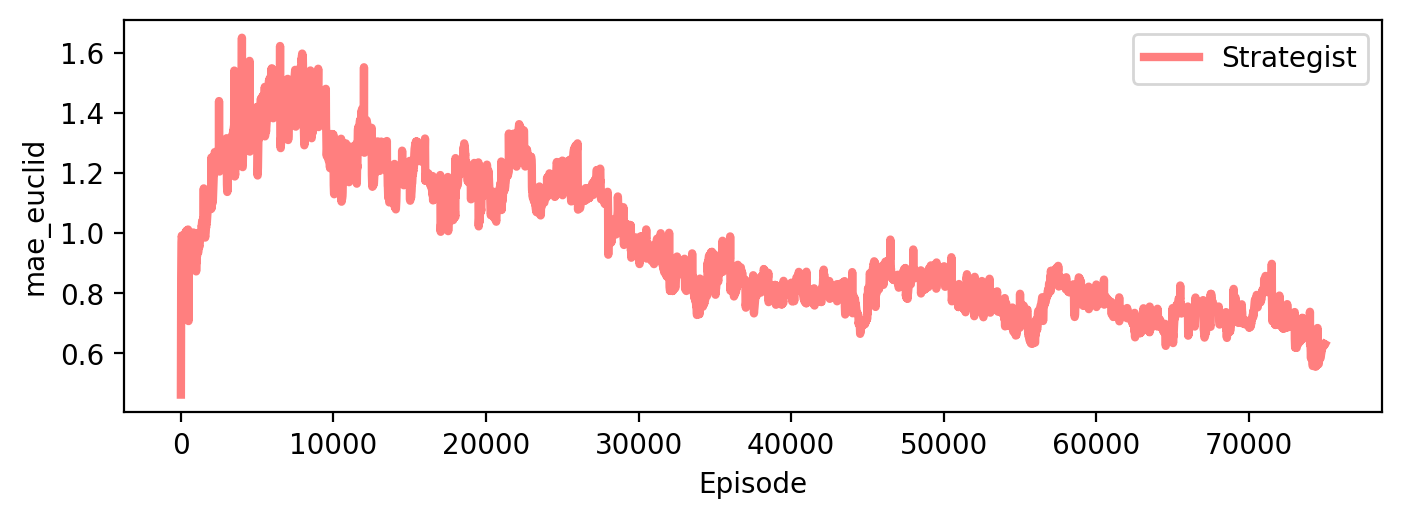

In [34]:
plt.figure(figsize=(7, 2.5))
_ = plt.plot(episode_14_euc, exp_14_avg_euc, color='red', alpha=.5, linewidth=3, label="Strategist")
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("mae_euclid")

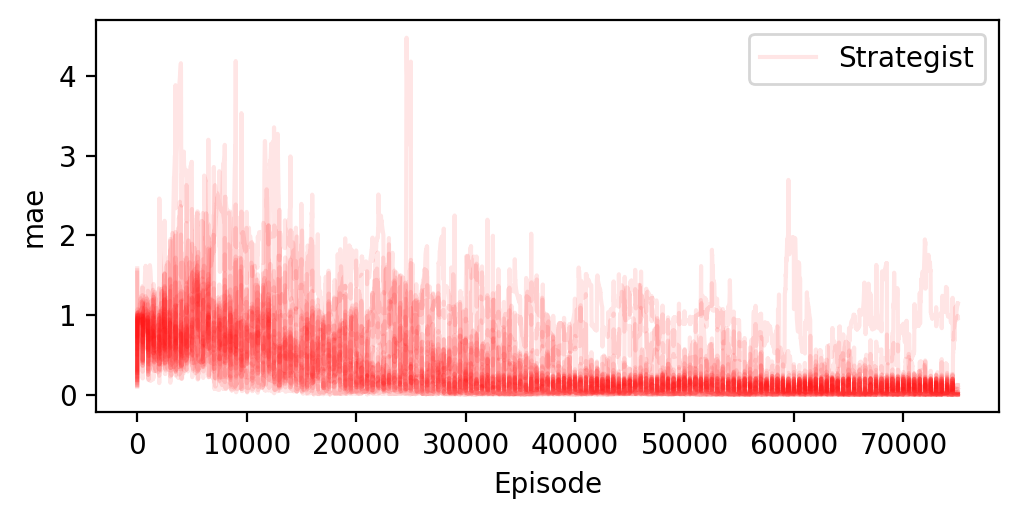

In [35]:
plt.figure(figsize=(5, 2.5))

for n, mon in enumerate(exp_14):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Strategist"
    
    # Plot
    _ = plt.plot(mon['episode'], mon['mae'], 
                    color='red', alpha=.1, label=lab)

_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("mae")

In [36]:
episode_14, exp_14_avg, _ = score_summary(exp_14, key='mae')

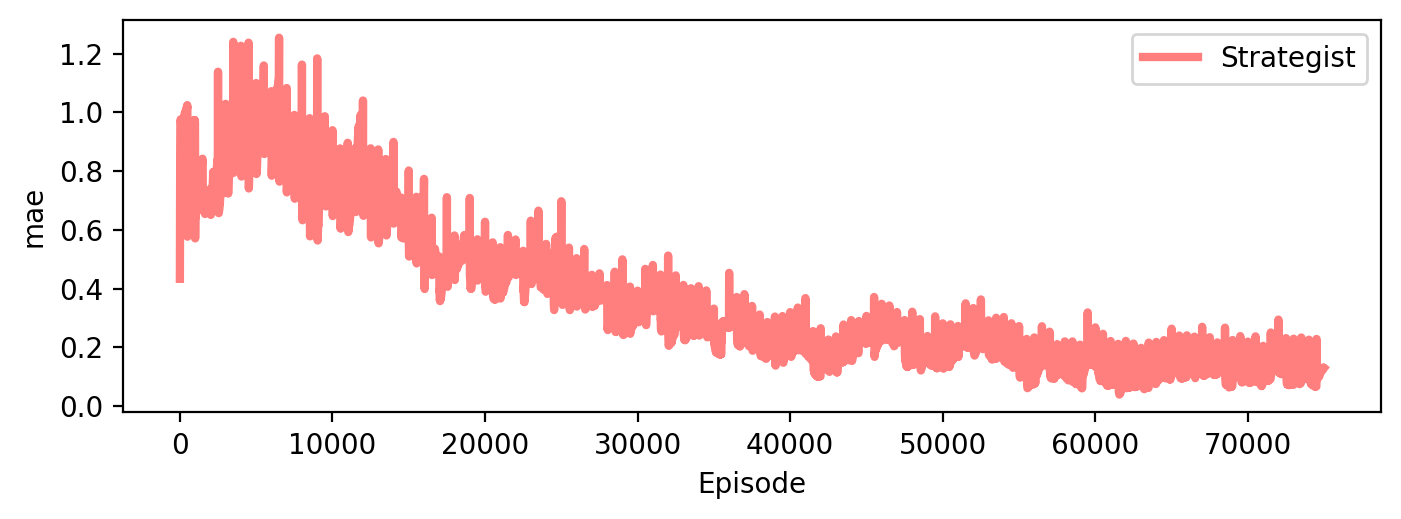

In [37]:
plt.figure(figsize=(7, 2.5))
_ = plt.plot(episode_14, exp_14_avg, color='red', alpha=.5, linewidth=3, label="Strategist")
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("mae")

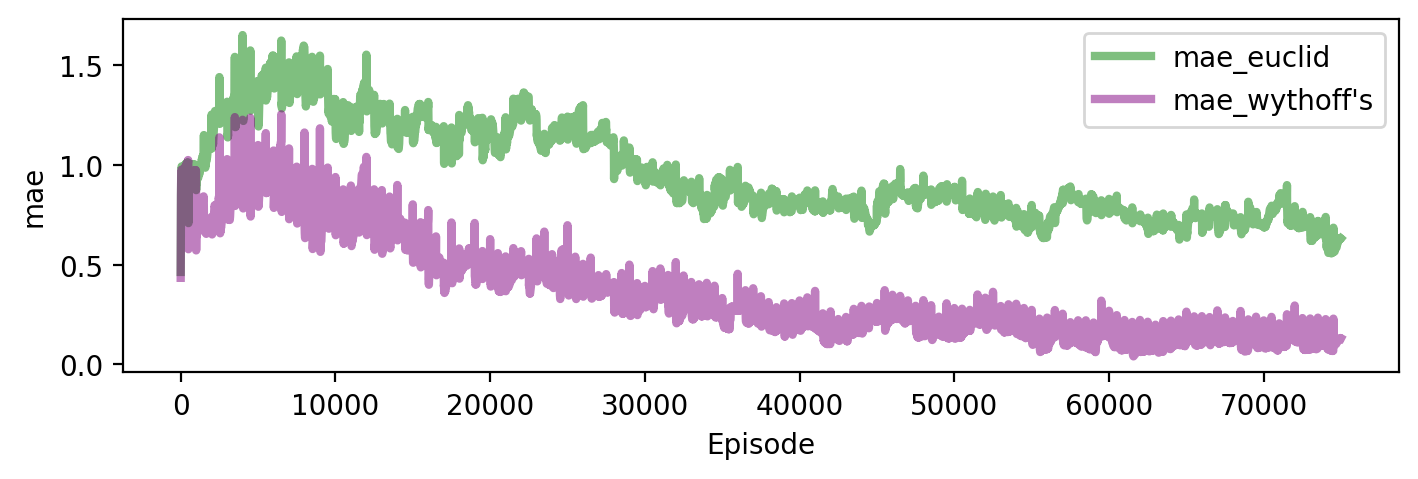

In [38]:
plt.figure(figsize=(7, 2.5))

_ = plt.plot(episode_14_euc, exp_14_avg_euc, color='green', alpha=.5, linewidth=3, label="mae_euclid")
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
# _ = plt.ylabel("mae_euclid")

_ = plt.plot(episode_14, exp_14_avg, color='purple', alpha=.5, linewidth=3, label="mae_wythoff's")
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("mae")

In [39]:
max(episode_14)

74990.0